# Лабораторна робота 1

## Дослідження та візуалізація даних за допомогою Python

### Мета роботи: Отримати базові навички використання Python для дослідження та візуалізації даних

#### _Виконав студент групи КН-221а Чередниченко Максим_

In [23]:
N = ord("M") % 3 + 1
print(N)

3


### Варіант 3. Дослідження втрат бронетранспортерів (БТР).
1. Створіть функцію, яка приймає назву файлу та назву стовпця як
параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив
numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої
дати в наборі даних)

Загальні втрати БТР: 9631
5 найбільших добових втрат БТР: [ 91  96 110 120 190]
Втрати БТР влітку 2023 року: 1126
Середнє значення знищених БТР за 100-500 днів війни: 11.435


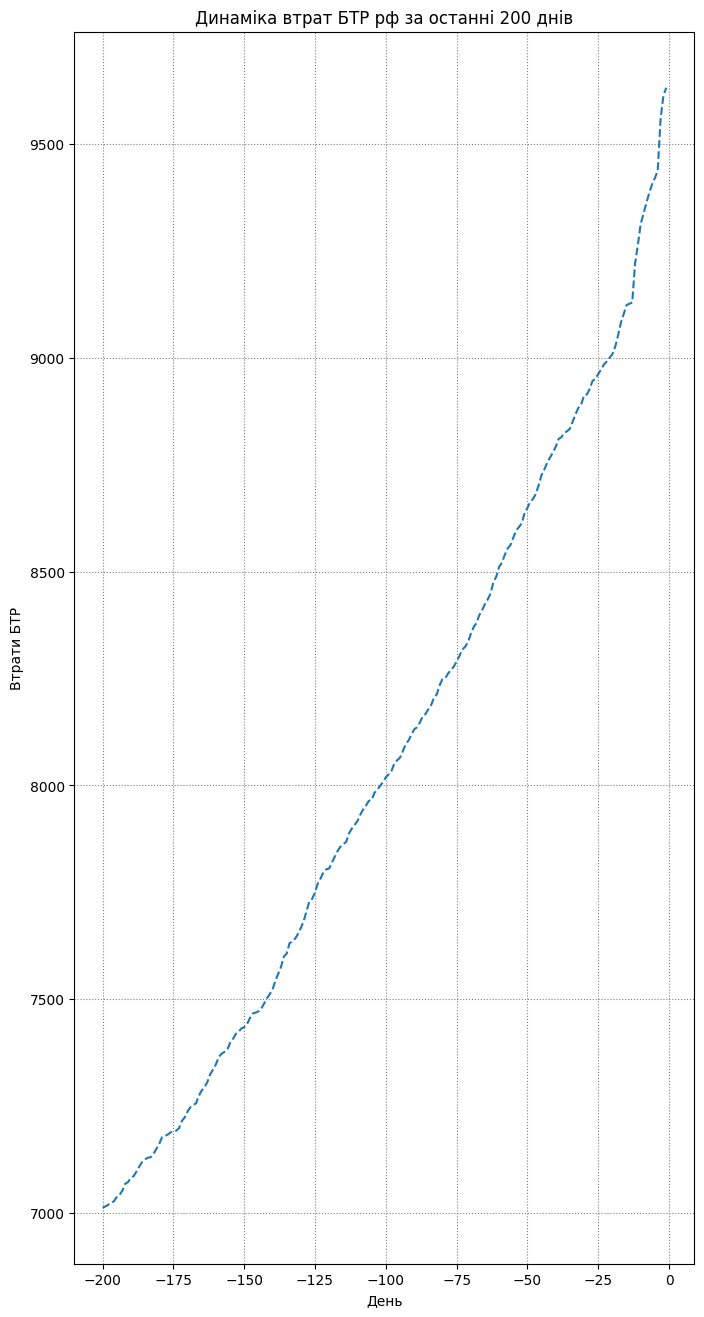

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def get_arr(file_name, column_n):
    with open(file_name, 'r') as file:
        csvreader = csv.reader(file)
        next(csvreader)
        arr = []
        for row in csvreader:
            arr.append(int(row[column_n]))
    return np.array(arr)
def get_date_index(file_name, date):
    with open(file_name, 'r') as file:
        csvreader = csv.reader(file)
        next(csvreader)
        arr = []
        for row in csvreader:
            arr.append(row[0])
        for i in range(len(arr)):
            if arr[i] == date:
                return i
    return -1
    

apc_arr = get_arr("russia_losses_equipment.csv", 5)
diff_arr = np.diff(apc_arr)

print("Загальні втрати БТР:", apc_arr[-1])
print("5 найбільших добових втрат БТР:", np.sort(diff_arr)[-5:])

summer_2023_start = get_date_index("russia_losses_equipment.csv", "2023-06-01")
summer_2023_end = get_date_index("russia_losses_equipment.csv", "2023-08-31")

print("Втрати БТР влітку 2023 року:", apc_arr[summer_2023_end] - apc_arr[summer_2023_start])
print("Середнє значення знищених БТР за 100-500 днів війни:", np.mean(diff_arr[100:500]))

last_200_days = apc_arr[-200:]
x = np.arange(-200,0)
plt.figure(figsize=(8, 16), dpi=100)
plt.plot(x, last_200_days, linestyle='--')
plt.grid(True, linestyle=':', color='gray')
plt.xlabel("День")
plt.ylabel("Втрати БТР")
plt.title("Динаміка втрат БТР рф за останні 200 днів")
plt.show()